<a href="https://colab.research.google.com/github/JulioHenri/Scraping-tables-python/blob/master/Ney_X_Mpabbe_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Know your dataset is an important skill that all Data Scients need to know, but for that you first know how collect your data to analyze, explore and do whatever you want with your dataset because they will not came to you on csv files like Kaggle.

In this project I'll collect two tables from a website (That is called Web Scraping) where contains stats of 2 players of football: Neymar and Mbappe and explore this data. 

#Importing Libs

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#Inicial Scraping

In [2]:
url = 'https://fbref.com/en/players/69384e5d/all_comps/Neymar-Stats---All-Competitions'
response = urlopen(url)

#reading html
html = response.read()

In [3]:
#reading organized html 
soup = BeautifulSoup(html, 'html.parser')

In [4]:
table = soup.find_all(name='table')
table = table[0]


In [ ]:
#transforming table into string
table_str = str(table)

In [ ]:
#reading online the first table of website
neymar = pd.read_html(table_str)[0]
neymar.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  ... Per 90 Minutes Unnamed: 27_level_0
              Season                Age  ...        npxG+xA             Matches
0          2013-2014                 21  ...            NaN             Matches
1          2013-2014                 21  ...            NaN             Matches
2          2014-2015                 22  ...            NaN             Matches
3          2014-2015                 22  ...            NaN             Matches
4          2014-2015                 22  ...            NaN             Matches

[5 rows x 28 columns]

In [ ]:
#Doing the same for obtain Mbappe's table
url = 'https://fbref.com/en/players/42fd9c7f/all_comps/Kylian-Mbappe-Stats---All-Competitions'
response = urlopen(url)

#reading html
html = response.read()
html 

#reading organized html 
soup = BeautifulSoup(html, 'html.parser')
soup

#extracting table
table = soup.find_all(name='table')
table = table[0]
table

#transforming into DF
table_str = str(table)
mbappe = pd.read_html(table_str)[0]
mbappe.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  ... Per 90 Minutes Unnamed: 27_level_0
              Season                Age  ...        npxG+xA             Matches
0          2015-2016                 16  ...            NaN             Matches
1          2015-2016                 16  ...            NaN             Matches
2          2015-2016                 16  ...            NaN             Matches
3          2016-2017                 17  ...            NaN             Matches
4          2016-2017                 17  ...            NaN             Matches

[5 rows x 28 columns]

#Handling the tables

In [ ]:
neymar.columns = ['Season','Age','Squad','Country','Comp','MP','Starts','Min',
                  'Gls','Ast','PK','PKatt','CrdY','CrdR','Gls_90min','Ast_90min','G+A','G-PK','G+A-PK',
                  'xG','npxG','xA','xG','xA','xG+xA','npxG','npxG+xA','Matches']

In [ ]:
mbappe.columns = ['Season','Age','Squad','Country','Comp','MP','Starts','Min',
                  'Gls','Ast','PK','PKatt','CrdY','CrdR','Gls_90min','Ast_90min','G+A','G-PK','G+A-PK',
                  'xG','npxG','xA','xG','xA','xG+xA','npxG','npxG+xA','Matches']

In [ ]:
neymar.drop(['xG','npxG','xA','xG','xA','xG+xA','npxG','npxG+xA','Matches'],
            axis = 1, inplace = True)
mbappe.drop(['xG','npxG','xA','xG','xA','xG+xA','npxG','npxG+xA','Matches'],
            axis = 1, inplace = True)

In [ ]:
neymar.head()

,Season,Age,Squad,Country,Comp,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK
0,2013-2014,21,Barcelona,NaN,1. Champions Lg,10,9,776,4,3,0,0,1,0,0.46,0.35,0.81,0.46,0.81
1,2013-2014,21,Barcelona,es ESP,1. La Liga,26,19,1734,9,8,1,1,6,0,0.47,0.42,0.88,0.42,0.83
2,2014-2015,22,Barcelona,NaN,1. Champions Lg,12,12,1027,10,1,0,0,1,0,0.88,0.09,0.96,0.88,0.96
3,2014-2015,22,Barcelona,es ESP,Copa del Rey,6,6,501,7,0,0,1,1,0,1.26,0.00,1.26,1.26,1.26
4,2014-2015,22,Barcelona,es ESP,1. La Liga,33,29,2562,22,7,1,1,6,0,0.77,0.25,1.02,0.74,0.98


In [ ]:
neymar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Season     34 non-null     object
 1   Age        34 non-null     object
 2   Squad      34 non-null     object
 3   Country    18 non-null     object
 4   Comp       28 non-null     object
 5   MP         35 non-null     object
 6   Starts     35 non-null     object
 7   Min        35 non-null     object
 8   Gls        35 non-null     object
 9   Ast        35 non-null     object
 10  PK         35 non-null     object
 11  PKatt      35 non-null     object
 12  CrdY       35 non-null     object
 13  CrdR       35 non-null     object
 14  Gls_90min  35 non-null     object
 15  Ast_90min  35 non-null     object
 16  G+A        35 non-null     object
 17  G-PK       35 non-null     object
 18  G+A-PK     35 non-null     object
dtypes: object(19)
memory usage: 5.5+ KB


Scraping was not perfect, so we'll exclude all lines before line 23 (because they don't belongs to our table).

In [ ]:
for line in neymar.index:
  if line > 23:
    neymar.drop(line, inplace = True)

In [ ]:
for line in mbappe.index:
  if line > 21:
    mbappe.drop(line, inplace = True)

When we obtain a html table with Pandas, all values are read as objects so I'll transform some columns in numeric numbers.

In [ ]:
numeric_cols = neymar.drop(['Season','Squad','Country','Comp'], axis = 1)
cat_cols = neymar[['Season','Squad','Country','Comp']]

In [ ]:
numeric_cols = numeric_cols.astype(float)

In [ ]:
ney = pd.concat([cat_cols, numeric_cols], axis = 1)
ney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     24 non-null     object 
 1   Squad      24 non-null     object 
 2   Country    17 non-null     object 
 3   Comp       24 non-null     object 
 4   Age        24 non-null     float64
 5   MP         24 non-null     float64
 6   Starts     24 non-null     float64
 7   Min        24 non-null     float64
 8   Gls        24 non-null     float64
 9   Ast        24 non-null     float64
 10  PK         24 non-null     float64
 11  PKatt      24 non-null     float64
 12  CrdY       24 non-null     float64
 13  CrdR       24 non-null     float64
 14  Gls_90min  24 non-null     float64
 15  Ast_90min  24 non-null     float64
 16  G+A        24 non-null     float64
 17  G-PK       24 non-null     float64
 18  G+A-PK     24 non-null     float64
dtypes: float64(15), object(4)
memory usage: 3.8+ KB


In [ ]:
#doing the same for Mbappe's table
numeric_cols = mbappe.drop(['Season','Squad','Country','Comp'], axis = 1)
cat_cols = mbappe[['Season','Squad','Country','Comp']]

numeric_cols = numeric_cols.astype(float)

mbappe = pd.concat([cat_cols, numeric_cols], axis = 1)
mbappe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     22 non-null     object 
 1   Squad      22 non-null     object 
 2   Country    17 non-null     object 
 3   Comp       22 non-null     object 
 4   Age        22 non-null     float64
 5   MP         22 non-null     float64
 6   Starts     22 non-null     float64
 7   Min        21 non-null     float64
 8   Gls        21 non-null     float64
 9   Ast        21 non-null     float64
 10  PK         21 non-null     float64
 11  PKatt      21 non-null     float64
 12  CrdY       21 non-null     float64
 13  CrdR       21 non-null     float64
 14  Gls_90min  21 non-null     float64
 15  Ast_90min  21 non-null     float64
 16  G+A        21 non-null     float64
 17  G-PK       21 non-null     float64
 18  G+A-PK     21 non-null     float64
dtypes: float64(15), object(4)
memory usage: 3.4+ KB


# Dataset

Season - Usualy 10 months of Championships <br>
Age - Age of player<br>
Squad - Club of player<br>
Country - Country of Club <br>
Comp - Competition<br>
MP - Matches played by player<br>
Starts - Games started by player<br>
Min - Minutes <br>
Gls - Goals scored<br>
Ast - Assists<br>
PK - Penalti Kicks made<br>
PKatt - Penalti Kicks attempt<br>
CrdY - Yellow Cards<br>
CrdR - Red Cards<br>
Gls_90min - Goals per game<br>
Ast_90min - Assists per game<br>
G+A - Golas plus assists per game<br>
G-PK - Goals minus penalti kicks per game<br>
G+A PK - Goals plus Assists minus penaltis per game <br>



#Exploratory Data Analysis

In [ ]:
ney.describe().round(2)

,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,24.46,11.04,10.42,930.71,7.21,4.08,1.12,1.38,2.62,0.21,0.73,0.33,1.06,0.62,0.95
std,1.96,10.37,9.71,863.23,6.97,4.06,1.65,1.93,2.14,0.59,0.39,0.25,0.39,0.42,0.44
min,21.00,1.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,3.00,3.00,292.75,2.00,0.75,0.00,0.00,1.00,0.00,0.46,0.07,0.88,0.39,0.78
50%,25.00,7.00,6.50,607.50,4.00,2.50,0.50,1.00,2.00,0.00,0.73,0.35,1.04,0.58,0.99
75%,26.00,15.50,15.25,1348.25,10.75,7.00,1.00,1.25,4.25,0.00,0.90,0.47,1.31,0.78,1.20
max,27.00,34.00,34.00,3055.00,24.00,13.00,5.00,7.00,7.00,2.00,2.00,0.90,2.00,2.00,2.00


In [ ]:
mbappe.describe().round(2)

,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK
count,22.00,22.00,22.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,18.18,8.18,6.23,595.38,5.48,2.62,0.14,0.24,0.76,0.14,0.61,0.46,1.07,0.58,1.04
std,1.37,9.41,7.42,680.42,8.13,2.77,0.48,0.77,1.18,0.36,0.49,0.59,0.70,0.51,0.70
min,16.00,0.00,0.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,1.25,1.00,122.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.00,0.71
50%,18.00,4.00,3.00,296.00,3.00,2.00,0.00,0.00,0.00,0.00,0.56,0.39,1.02,0.56,1.01
75%,19.00,9.75,7.50,658.00,5.00,5.00,0.00,0.00,1.00,0.00,1.00,0.68,1.38,1.00,1.38
max,20.00,29.00,24.00,2343.00,33.00,9.00,2.00,3.00,5.00,1.00,1.70,2.65,2.65,1.70,2.65


Notes:

1. Neymar has average of minutes played biggest than Mbappe.

2. The greatest number of goals that Neymar scored in a championship was 24, while Mbappe's was 33 and the Brazilian's average goal in the championships was higher than French player, (7.21 and 5.48, respectively). Which shows that Neymar has more regularity when we talk about goals by competitions.

3. Mbappe receives fewer cards (yellow and red) than his teammate. In addition, both players have average goals + assists almost the same.

4. In the best competition of their career, Mbappe and Neymar obtained 2.65 and 2.0, respectively, of goals + assists per game.

Obs: The table references to Neymar after he had left Santos F.C and going to Barcelona! Seasons in Brazil will not appears.

# Joining DataFrames

In [ ]:
#adding column with name 'Neymar' as all values.
ney['Player'] = 'Neymar'

In [ ]:
df = pd.concat([ney, mbappe])
df.tail()

,Season,Squad,Country,Comp,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK,Player
17,2019-2020,Paris S-G,NaN,1. Champions Lg,20.0,10.0,6.0,654.0,5.0,5.0,0.0,0.0,1.0,0.0,0.69,0.69,1.38,0.69,1.38,NaN
18,2019-2020,Paris S-G,fr FRA,Coupe de France,20.0,3.0,3.0,212.0,4.0,1.0,0.0,0.0,1.0,0.0,1.70,0.42,2.12,1.70,2.12,NaN
19,2019-2020,Paris S-G,fr FRA,1. Coupe de la Ligue,20.0,3.0,3.0,247.0,2.0,3.0,0.0,0.0,1.0,0.0,0.73,1.09,1.82,0.73,1.82,NaN
20,2019-2020,Paris S-G,fr FRA,1. Ligue 1,20.0,20.0,17.0,1513.0,18.0,5.0,0.0,0.0,0.0,0.0,1.07,0.30,1.37,1.07,1.37,NaN
21,2019-2020,Paris S-G,fr FRA,Trophée des Champions,20.0,1.0,1.0,90.0,1.0,0.0,0.0,0.0,1.0,0.0,1.00,0.00,1.00,1.00,1.00,NaN


Index of DataFrame it's wrong, so I'll handle this later and in the column 'Player', all lines of Mbappe has NaN values, so I'll change.

In [ ]:
df['Country'].isna()

0      True
1     False
2      True
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
0     False
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
Name: Country, dtype: bool

It's notorious that NaN values in country represents competitions of all countrys in Europe.

In [ ]:
df['Country'].fillna('Europe', inplace = True) #changing the NaN values as Europe
df['Player'].fillna('Mbappe', inplace = True) #changing the NaN values as Mbappe

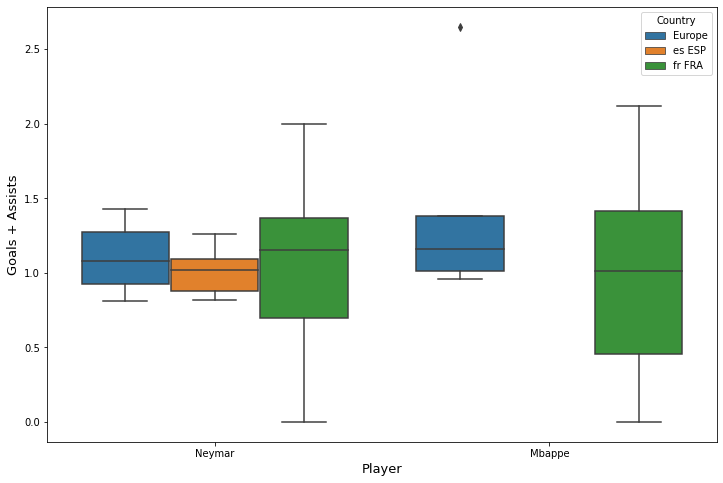

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Player', y='G+A', data = df, hue='Country')
ax.set_xlabel('Player', fontsize=13)
ax.set_ylabel('Goals + Assists', fontsize=13)
ax

Analyzing Outlier, we can see that Mbappe played only 34 minutes in this competition and got 1 assist, that is the reason of your high percentual of goals + assists by game. In this case, i decided remove this register because it don't show relevant information.

In [ ]:
df.reset_index(drop=True, inplace = True) #fixing the index

In [ ]:
df[df['G+A'] == 2.65]

,Season,Squad,Country,Comp,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK,Player
25,2015-2016,Monaco,Europe,2. Europa Lg,16.0,1.0,0.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.65,2.65,0.0,2.65,Mbappe


In [ ]:
df.drop(25, inplace = True) #removing the register

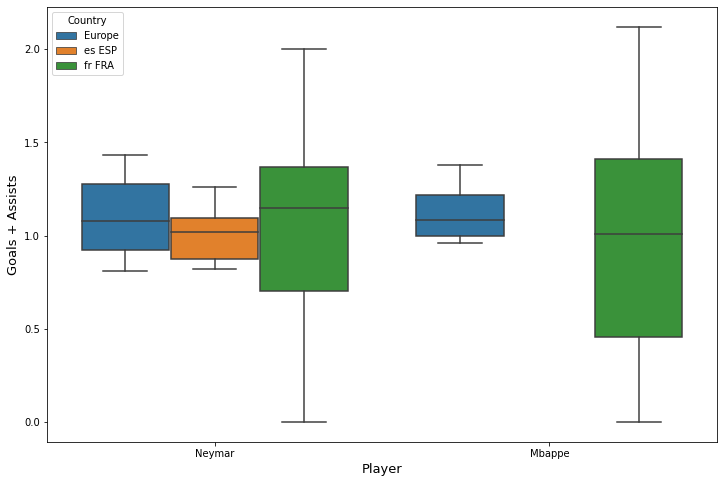

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Player', y='G+A', data = df, hue='Country')
ax.set_xlabel('Player', fontsize=13)
ax.set_ylabel('Goals + Assists', fontsize=13)
ax

Exploring graph above, in Europe Championships (Europe League and Champions League) both players has a Median 1.1 but Neymar have a biggest IQR (Interquartile Range) it means that the values of Goals + Assists per game of Brazilian player has more variation.

Comparing the goals + assists per game of teammates in competitions of France (Coup de la Ligue, Ligue 1, Coupe de France and Trophée des Champions) we can observe similar informations but now Mbappe have the biggest IQR.
The distribution of Neymar has left-skewed and Mbappe too but not so high.

In [ ]:
df.isna().sum()

Season       0
Squad        0
Country      0
Comp         0
Age          0
MP           0
Starts       0
Min          1
Gls          1
Ast          1
PK           1
PKatt        1
CrdY         1
CrdR         1
Gls_90min    1
Ast_90min    1
G+A          1
G-PK         1
G+A-PK       1
Player       0
dtype: int64

In [ ]:
df.query('Min == "NaN"')

,Season,Squad,Country,Comp,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK,Player
28,2016-2017,Monaco,fr FRA,Coupe de France,17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mbappe


In [ ]:
df.drop(28, inplace = True)

Esses valores nulos estão em somente um registro, de uma temporada que o Mbappe tinha 17 anos. Deduzimos que nessa temporada e nessa competição o Mbappe pode ter se machucado ou ter ficado como reserva por opção do treinador.

In [ ]:
df.groupby(by='Player').sum()

,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls_90min,Ast_90min,G+A,G-PK,G+A-PK
Player,,,,,,,,,,,,,,,
Mbappe,384.0,179.0,137.0,12469.0,115.0,54.0,3.0,5.0,16.0,3.0,12.74,7.08,19.82,12.19,19.28
Neymar,587.0,265.0,250.0,22337.0,173.0,98.0,27.0,33.0,63.0,5.0,17.45,8.00,25.47,14.83,22.81


Using group by we can observe sum of player's stats in their carrer and do some notes.

1. Neymar has more years playing football so his attributes are biggest than Mbappe.

2. French player is next to Neymar in assist per game, goals minus penaltis per game (because Neymar is the official kicker) and goals plus assits minus penaltis.

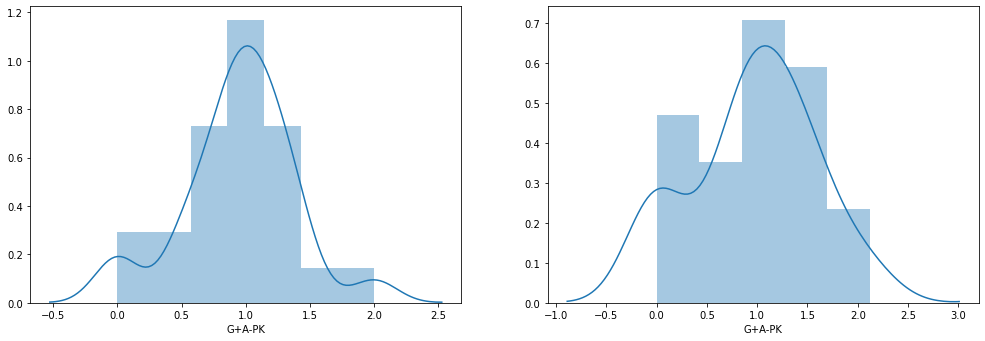

In [ ]:
neymar = df.query('Player == "Neymar"')['G+A-PK']
mbappe = df.query('Player == "Mbappe"')['G+A-PK']

plt.figure(figsize=(17,12))

plt.subplot(2, 2, 1)
sns.distplot(neymar)

plt.subplot(2, 2, 2)
sns.distplot(mbappe)

Neymar's distribuction has a normal format and the values are biggest than Mbappe's (pay attention on scale).

# Conclusion

I hope you understood the importance of collect data and that you need to know this to become a Data Scientist. 

In this project I could show a scraping of a website (two differents tables, join tables, transform types of columns and explore data.

That was not a balanced comparison because Neymar has more experience than Mbappe but we could see interesting features like Brazilian athlete is more agressive than French and Neymar is more constant when we talk about goals in career.